<a href="https://colab.research.google.com/github/Kim-Yeonjoo/DeepLearning/blob/main/8_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀 문제

In [1]:
from tensorflow.keras.datasets import boston_housing

boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [5]:
# 타켓 - 주택 중간 가격 > 천 달러 단위
train_targets[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

# 데이터 정규화
  > 특성별 정규화: 입력 데이터 각 특성(열)에 대해 특성의 평균을 빼고 표준 편차로 나눈다.  
  특성의 중앙이 0 근처에 맞춰지고, 표준 편차 1이 됩니다.

In [7]:
# 훈련데이터
mean = train_data.mean(axis=0)   # 훈련 데이터의 각 특성(feature)에 대한 평균값
train_data -= mean   # 훈련 데이터에서 계산된 평균값을 빼기 -> 평균 0으로 만드는 과정

std = train_data.std(axis=0)   # 평균을 뺀 훈련 데이터의 각 특성에 대한 표준편차를 계산
train_data /= std   # 훈련 데이터를 표준편차로 나누기 -> 데이터 분산 1

# 테스트 데이터
test_data -= mean
test_data /= std

# 모델 구성

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential(
      [
          layers.Dense(64, activation='relu'),
          layers.Dense(64, activation='relu'),
          layers.Dense(1)    # 선형 층 > 모델 자유로운 학습 > 어떤 범위 값이라도 예측
      ]
  )

  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

# K-겹 검증
- 데이터 포인트가 많지 않음 > 검증 세트 분할에 대한 검증 점수의 분산 높을때 사용
  > 데이터를 K개 분할 -> K개의 모델 각각 생성 -> K-1개의 분할에서 훈련, 나머지 분할에서 평가  
  => 모델의 검증 점수: K개의 검증 점수 평균

In [22]:
# k 겹 검증하기

import numpy as np

k = 4
num_val_samples = len(train_data) // k

num_epochs = 100
all_scores = []

for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]   # 검증 데이터 준비: k번째 분할
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()

    # 모델 훈련 (verbose=0 > 훈련 과정 출력 x)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)

                                                 # 검증 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [17]:
all_scores

[7.756309986114502, 10.973230361938477, 13.264534950256348, 11.303548812866211]

In [18]:
np.mean(all_scores)

10.824406027793884

In [23]:
# 각 폴드의 검증 점수 저장

num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]   # 검증 데이터 준비: k 분할
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성
    model = build_model()

    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)

    mae_history = history.history['val_mae']

    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [24]:
# k 겹 검증 점수 평균 기록
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

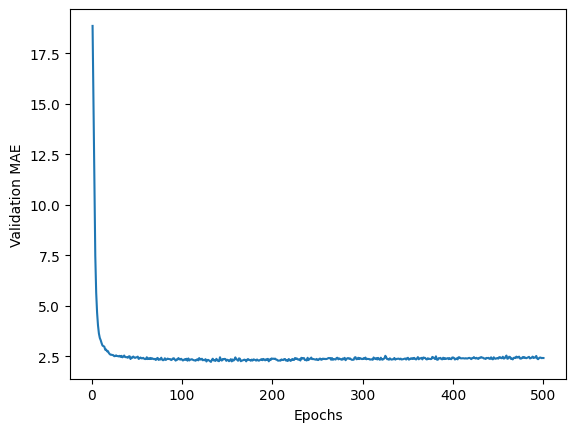

In [25]:
# 검증 점수 그래프
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

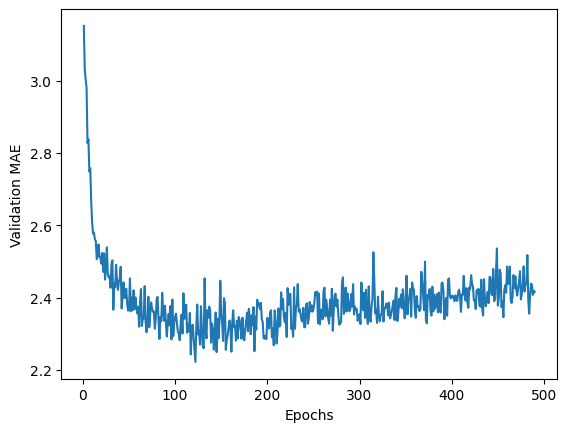

In [26]:
# 처음 10개의 데이터 포인트를 제외한 검증 점수 그래프

truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# 훈련

In [27]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.8752 - mae: 2.5007 


In [28]:
test_mae_score

2.6489317417144775

In [34]:
model_1 = build_model()
model_1.fit(train_data, train_targets,
          epochs=130, batch_size=32, verbose=0)
test_mse_score, test_mae_score = model_1.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.3998 - mae: 2.5082 


In [35]:
test_mae_score

2.7322795391082764

In [36]:
model_2 = build_model()
model_2.fit(train_data, train_targets,
          epochs=150, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model_2.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.1132 - mae: 2.3834 


In [37]:
test_mae_score

2.5362439155578613

# 새로운 데이터 예측

In [29]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([6.833812], dtype=float32)